In [1]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

                     Open      High       Low  Shares Traded  Turnover in Rs.  \
Open             1.000000  0.999940  0.999913       0.707651         0.818904   
High             0.999940  1.000000  0.999883       0.709643         0.820523   
Low              0.999913  0.999883  1.000000       0.705038         0.816844   
Shares Traded    0.707651  0.709643  0.705038       1.000000         0.914973   
Turnover in Rs.  0.818904  0.820523  0.816844       0.914973         1.000000   
Close            0.999866  0.999935  0.999931       0.707383         0.818792   

                    Close  
Open             0.999866  
High             0.999935  
Low              0.999931  
Shares Traded    0.707383  
Turnover in Rs.  0.818792  
Close            1.000000  


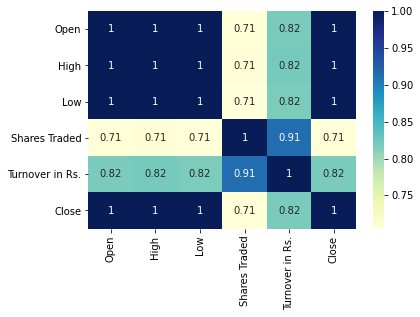

In [2]:
dataset = pd.read_csv("Nifty50.csv")
dataset.describe()
print(dataset.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6198 entries, 0 to 6197
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Day              6198 non-null   object 
 1   Open             6198 non-null   float64
 2   High             6198 non-null   float64
 3   Low              6198 non-null   float64
 4   Shares Traded    6198 non-null   int64  
 5   Turnover in Rs.  6198 non-null   float64
 6   Close            6198 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 339.1+ KB


In [4]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = X[:, 0:]

In [7]:
X = pd.DataFrame(X)

In [8]:
X.drop(X.columns[[0]], axis = 1, inplace = True)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [12]:
Y_pred = regressor.predict(X_test)

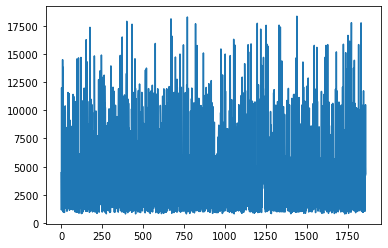

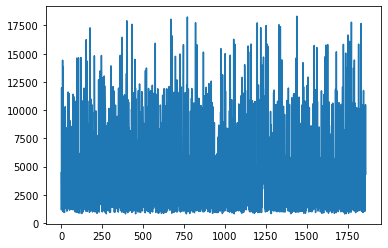

In [13]:
x = [] 
for i in range(1, len(Y_test)+1):
    x.append(i)
plt.plot(x,Y_test)
plt.show()
plt.plot(x,Y_pred)
plt.show()

In [14]:
print("Actual: ", Y_test)

Actual:  [ 4464.    1158.9  11994.2   2032.2   5559.3   1982.    8185.8   1394.1
 14484.75  1011.45 13817.55  2220.8   8044.15  7474.1   1031.05  6200.05
  5704.4    969.9   4433.55   941.35  1103.05  5999.05  1321.25  1439.7
 10386.6   4733.    3718.    5362.95  8477.3   5011.75  2803.05  1307.65
  6071.65  7108.75  1085.25  1046.6   1388.75  1284.65  3921.2   9794.15
 10430.05 11575.95  7585.    1355.1   4841.6   8370.25 10735.45  2557.35
 11470.7   1413.1   1138.45  1417.5   4263.95  3798.1   9111.9   1224.4
  1428.25  5280.35  8494.2   1214.9   3829.85  4544.2   5855.75  1286.75
  5334.6   1232.4   8592.15  3896.75  8220.8   5094.15  7276.4   1159.55
 11407.15  4252.65  5360.7   3143.2  11227.55  1728.8   6144.35 10321.75
  5687.25  1491.2   9859.5   5889.75  8897.55   990.05 10763.65  7191.75
 10118.25  8797.4   3197.1   2812.3   1001.75   951.2   4038.15 14549.4
  5667.65  5995.45  5878.     960.5   1815.7   2394.85  2484.15  1134.15
  1916.45 14644.7   1174.95  1873.35   875.05 

In [15]:
print("Predicted: ", Y_pred)

Predicted:  [ 4456.14150719  1161.56471694 11982.58340164  2019.94237128
  5261.1402471   1990.35341595  8183.37360676  1389.43488999
 14424.3871707   1019.23651516 13813.11245793  2209.02217088
  8058.81599761  7442.24681505  1038.29116695  6191.4654691
  5698.86627213   968.81752621  4462.83601585   927.98155433
  1100.75950847  6012.08572629  1324.72868861  1450.65938934
 10299.08660761  4769.58934145  3733.95144601  5363.43760563
  8452.53335212  4997.03398326  2831.71522159  1321.49412398
  6107.83504473  7113.49363772  1082.34497278  1045.87423847
  1371.17247307  1283.50393933  3856.03605575  9805.00110758
 10412.28775949 11604.8396742   7583.65663896  1339.48714395
  4863.98220396  8384.30688324 10732.81599539  2548.39911348
 11460.81157251  1420.96695395  1137.31867678  1420.31200581
  4267.93872644  3789.39837067  9055.31629214  1209.11547383
  1425.75615184  5284.09653416  8482.83456428  1219.24544703
  3820.20155443  4558.31433267  5849.86901482  1283.28364111
  5329.467461